## Algorithm using feature enginerring

features added were
1. character len of q1
2. charcter en of q2
3. no of wrds in q1
4. no of wrds in q2
5. no of common wrds in both qs
6. total wrds : both qs hae how many total unique words
7. words common / total unique wrds

In [ ]:
pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/NLP/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d quora/question-pairs-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('questions.csv')
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.shape

(404351, 6)

In [ ]:
df.isnull().sum()

## have few missing values, as we have large dataset its okay if we drop them too

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
## check the data for chaegorties, check if imbalanced

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

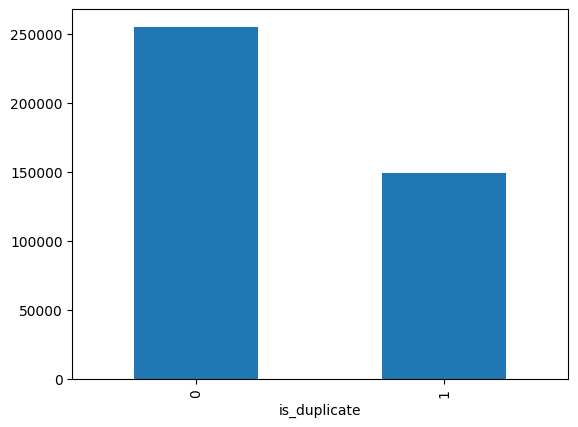

In [ ]:
print(df["is_duplicate"].value_counts())

df["is_duplicate"].value_counts().plot(kind = 'bar')

In [ ]:
## Repeated qs
qid = pd.Series(df['qid1'].tolist()+ df['qid2'].tolist())
print("Unique qs:", np.unique(qid).shape[0])

x = qid.value_counts()>1
print("No of repeated qs: ", x[x].shape[0])

## we have repeating qs count as 13698 in the dataset,
## amoung the whole qs avaliable

Unique qs: 789801
No of repeated qs:  13698


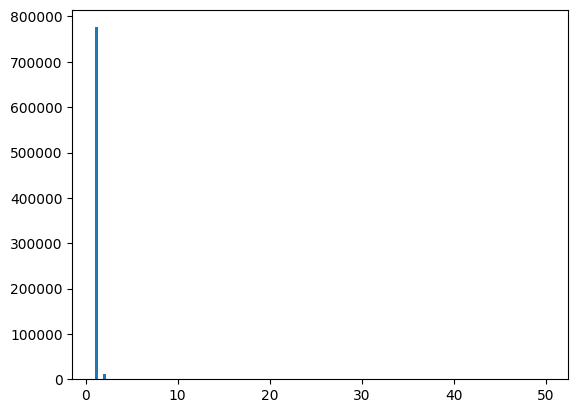

In [ ]:
plt.hist(qid.value_counts().values, bins = 160)
plt.show()

In [ ]:
## approach ---> apply bow on ques 1 and ques 2
## directly apply random forest on this

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/NLP/duplicate sent proj/new_df.csv')
new_df

,id,qid1,qid2,question1,question2,is_duplicate
0,88949,176616,176617,What is the best Java program to implement stack?,What are some good Java programs to practice w...,0
1,277672,545936,545937,Can Donald Trump still win the election?,Does Donald Trump has chamces to win US electi...,1
2,105726,209703,209704,How can one be less of an introvert?,Can one be an extrovert but also an introvert?,0
3,75188,149411,149412,People shouldn't have the right to commit suic...,Why don't we have a right to commit suicide?,1
4,15679,31293,31294,How can I make money as a 13 year old?,How can I make money as a thirteen year old?,0
...,...,...,...,...,...,...
29995,38560,76821,76822,How much money do cardiologists make per annum?,What was the SA and what is its history?,0
29996,80103,159124,159125,What are the implications of losing 10 pounds ...,Is there a safe method to lose 10 pounds in 2 ...,1
29997,278679,547881,547882,What are throwback thursdays on Instagram?,What are throwback thursdays on Instagram? How...,1
29998,138650,274477,274478,Can someone read my text messages if they bloc...,"If someone blocked me, will they still get my ...",1


In [ ]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,88949,176616,176617,What is the best Java program to implement stack?,What are some good Java programs to practice w...,0
1,277672,545936,545937,Can Donald Trump still win the election?,Does Donald Trump has chamces to win US electi...,1


In [ ]:
ques_df = new_df[['question1', "question2"]]
ques_df.head()

,question1,question2
0,What is the best Java program to implement stack?,What are some good Java programs to practice w...
1,Can Donald Trump still win the election?,Does Donald Trump has chamces to win US electi...
2,How can one be less of an introvert?,Can one be an extrovert but also an introvert?
3,People shouldn't have the right to commit suic...,Why don't we have a right to commit suicide?
4,How can I make money as a 13 year old?,How can I make money as a thirteen year old?


In [ ]:
question1 = list(ques_df['question1'])
question2 = list(ques_df['question2'])

In [ ]:
new_df['q1_char'] = new_df['question1'].str.len()
new_df['q2_char'] = new_df['question2'].str.len()


In [ ]:
new_df['q1_word'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_word'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis = 1)


In [ ]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
new_df['total_words'] = new_df.apply(total_words, axis =1)

In [ ]:
new_df['word_share'] = new_df['word_common']/new_df['total_words']

In [ ]:
## Analyzing the features added

max_char =  315
min_char =  5
avg_char =  58.346666666666664


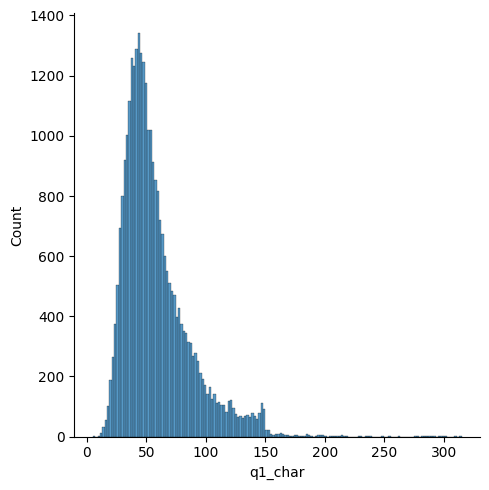

In [ ]:
# q1 - no of char
print('max_char = ', max(new_df['q1_char']))
print('min_char = ', min(new_df['q1_char']))
print('avg_char = ', np.mean(new_df['q1_char']))

sns.displot(new_df['q1_char'])

max_char =  1151
min_char =  1
avg_char =  58.948566666666665


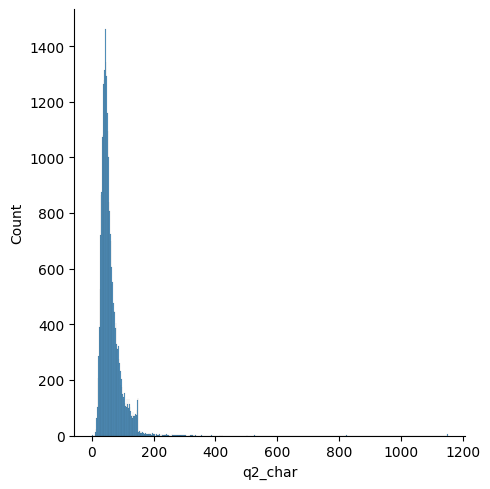

In [ ]:
 print('max_char = ', max(new_df['q2_char']))
print('min_char = ', min(new_df['q2_char']))
print('avg_char = ', np.mean(new_df['q2_char']))

sns.displot(new_df['q2_char'])

max_char =  66
min_char =  1
avg_char =  10.744266666666666


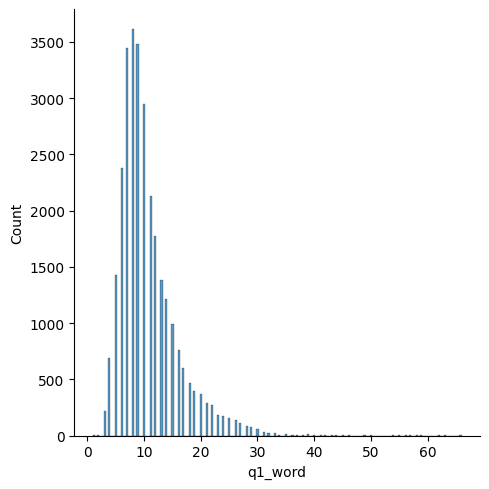

In [ ]:
print('max_char = ', max(new_df['q1_word']))
print('min_char = ', min(new_df['q1_word']))
print('avg_char = ', np.mean(new_df['q1_word']))

sns.displot(new_df['q1_word'])

max_char =  237
min_char =  1
avg_char =  10.962133333333334


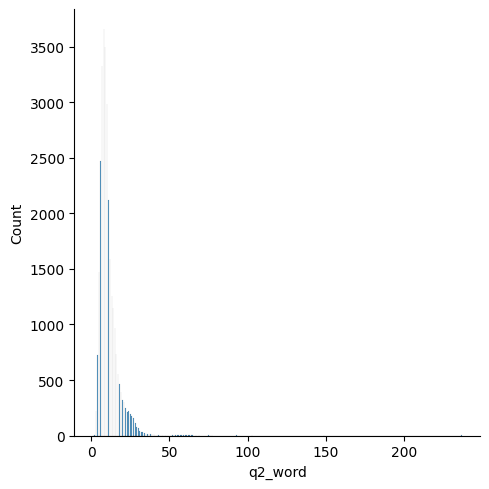

In [ ]:
 print('max_char = ', max(new_df['q2_word']))
print('min_char = ', min(new_df['q2_word']))
print('avg_char = ', np.mean(new_df['q2_word']))

sns.displot(new_df['q2_word'])

<ipython-input-31-068c7729f87a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']== 0]['word_common'], label = 'non_duplicate')
<ipython-input-31-068c7729f87a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'], label = 

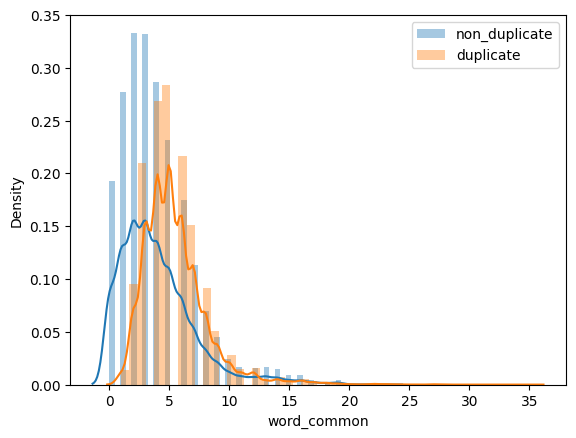

In [ ]:
sns.distplot(new_df[new_df['is_duplicate']== 0]['word_common'], label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'], label = 'duplicate')
plt.legend()
plt.show()

## here we see, for the non duplicate sent the values have more probability if common word is less,
## and duplicates probablity is more for the ones with large common words

<ipython-input-32-6ba94b13add9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label = 'non_duplicate')
<ipython-input-32-6ba94b13add9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'], label = 'dup

<Axes: xlabel='word_share', ylabel='Density'>

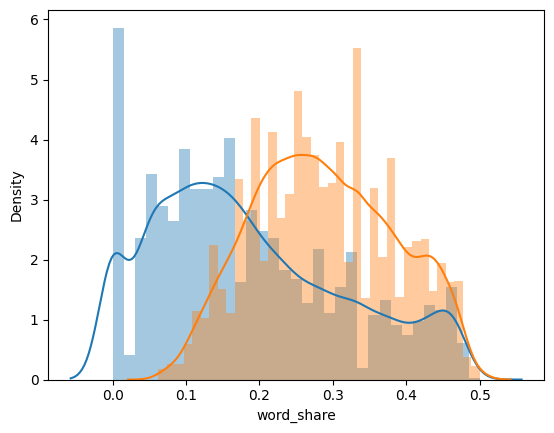

In [ ]:
## word_share

sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'], label = 'duplicate')

## same conclusion for word count canbe sseen here

In [ ]:
## Doing an EDA on these new features gives me the importance of these features
## and help in figuring out if we want to keep or not

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
ques_df = new_df[['question1','question2']]
ques = list(ques_df['question1'])+ list(ques_df['question2'])

In [ ]:
cv = CountVectorizer(max_features = 3000)

In [ ]:
q1_arr = cv.fit_transform(ques_df['question1']).toarray()
q2_arr = cv.fit_transform(ques_df['question2']).toarray()

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)

In [ ]:
temp_df.shape

(30000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
feat_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
feat_df.shape

(30000, 8)

In [ ]:
feat_df.head()

,is_duplicate,q1_char,q2_char,q1_word,q2_word,word_common,total_words,word_share
0,0,49,50,9,9,3,18,0.166667
1,1,40,50,7,9,3,16,0.187500
2,0,36,46,8,9,5,16,0.312500
3,1,50,44,8,9,5,17,0.294118
4,0,38,44,10,10,9,20,0.450000


In [ ]:
fin_df = pd.concat([feat_df, temp_df], axis =1)

In [ ]:
fin_df = temp_df.merge(feat_df, right_index=True, left_index=True, how = 'inner')

In [ ]:
fin_df

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,is_duplicate,q1_char,q2_char,q1_word,q2_word,word_common,total_words,word_share
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,49,50,9,9,3,18,0.166667
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,40,50,7,9,3,16,0.187500
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,36,46,8,9,5,16,0.312500
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,50,44,8,9,5,17,0.294118
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,38,44,10,10,9,20,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,47,40,8,9,0,16,0.000000
29996,0,0,1,0,0,0,0,0,0,0,...,0,0,1,56,51,11,12,5,23,0.217391
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,42,63,6,10,6,15,0.400000
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,53,59,10,11,6,21,0.285714


In [ ]:
fin_df.shape

(30000, 6008)

In [ ]:
x = fin_df.drop(columns = ['is_duplicate'])
y = fin_df.is_duplicate

In [ ]:
x.columns = x.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
## Logistic regression
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.757

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      2973
           1       0.75      0.77      0.76      3027

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000


confusion matrix:
 [[2204  769]
 [ 689 2338]]


In [ ]:
# Decision tree  classifier
model = DecisionTreeClassifier(criterion='gini', random_state=42)  # or use 'entropy'
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7125

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      2973
           1       0.70      0.74      0.72      3027

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000


confusion matrix:
 [[2028  945]
 [ 780 2247]]


In [ ]:
# ranfom forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7763333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      2973
           1       0.74      0.85      0.79      3027

    accuracy                           0.78      6000
   macro avg       0.78      0.78      0.77      6000
weighted avg       0.78      0.78      0.78      6000


confusion matrix:
 [[2094  879]
 [ 463 2564]]


In [ ]:
# Xtreme gradient boost classifier
xgb = XGBClassifier()
xgb.fit(x_train.values, y_train.values)
y_pred = xgb.predict(x_test.values)
accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy_score(y_test.values, y_pred))
print("\nClassification Report:\n", classification_report(y_test.values, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7755

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      2973
           1       0.73      0.87      0.80      3027

    accuracy                           0.78      6000
   macro avg       0.79      0.77      0.77      6000
weighted avg       0.79      0.78      0.77      6000


confusion matrix:
 [[2018  955]
 [ 392 2635]]
